Problem Statement of the project is to predict the cost of the sculptures from various artist across the world.


This jupyter notebook will consider the Exploratory Data Analysis(EDA) of the Dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Your code here

# Reset warnings filter to default behavior
warnings.filterwarnings("default")


In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head(10)

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23
5,fffe3300390039003900,Tracy Francis,0.99,46.0,19.0,1178.0,Wood,6.16,16.88,No,Yes,No,NaN,No,Wealthy,No,08/28/15,08/26/15,"Maddenberg, AL 43096",-1922.78
6,fffe3800360033003700,David Hawes,0.64,17.0,9.0,7264.0,Brass,8.26,90.67,No,Yes,No,Roadways,No,Working Class,No,06/05/16,06/02/16,"South Matthew, WV 76033",-1536.66
7,fffe3800300039003800,David Osher,0.74,23.0,10.0,3287.0,Clay,12.81,13.25,Yes,No,No,Waterways,Yes,Wealthy,No,06/04/19,05/31/19,"Davidmouth, CA 37824",-422.42
8,fffe3800330032003900,Arnold Reel,0.00,6.0,4.0,108.0,Clay,3.98,19.76,Yes,No,No,Waterways,Yes,Working Class,Yes,08/27/18,08/23/18,"Lisaville, ND 43925",-160.10
9,fffe3800310031003800,James Comfort,0.12,23.0,9.0,195226.0,Marble,245.63,49.25,No,No,No,Roadways,No,Working Class,No,07/14/16,07/10/16,"Jacobland, WV 85997",-834.27


In [6]:
df.shape

(6500, 20)

In [7]:
# Summary of the dataset with numerical column 
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


## Inferences 

The average artist reputation of the population is 0.46.

25% of the population have a price of sculpture below 5.

The median price of sculpture is 1192
.
The difference between the 75th percentile and the maximum value suggsts skewnss, particulable in height, with, and base shipp inrice.


e.
Skewness is also observed in weight and price of sculpture, likely due to the presence of outliers.

# Exploring Data

In [8]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [9]:
# seperating categorical and numerical columns 

num_col = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_col = [feature for feature in df.columns if df[feature].dtype == 'O']

print('The number of numerical columns are {} and the names are {}'.format(len(num_col),num_col))
print('The number of categorical columns are {} and the names are {}'.format(len(cat_col),cat_col))

The number of numerical columns are 7 and the names are ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']
The number of categorical columns are 13 and the names are ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


In [10]:
# Univariate analysis of categorical features 

cat_feature = []

for i in cat_col:
    print(f'{i}: {len(df[i].unique())}')
    if len(df[i].unique()) < 10:
        cat_feature.append(i)
        

Customer Id: 6500
Artist Name: 6449
Material: 8
International: 2
Express Shipment: 2
Installation Included: 2
Transport: 4
Fragile: 2
Customer Information: 2
Remote Location: 3
Scheduled Date: 1660
Delivery Date: 1664
Customer Location: 6500


Artist name, Customer Id and Customer location have 6500 uniqur observation. Thus they will be dropped.

In [11]:
cat_feature

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location']

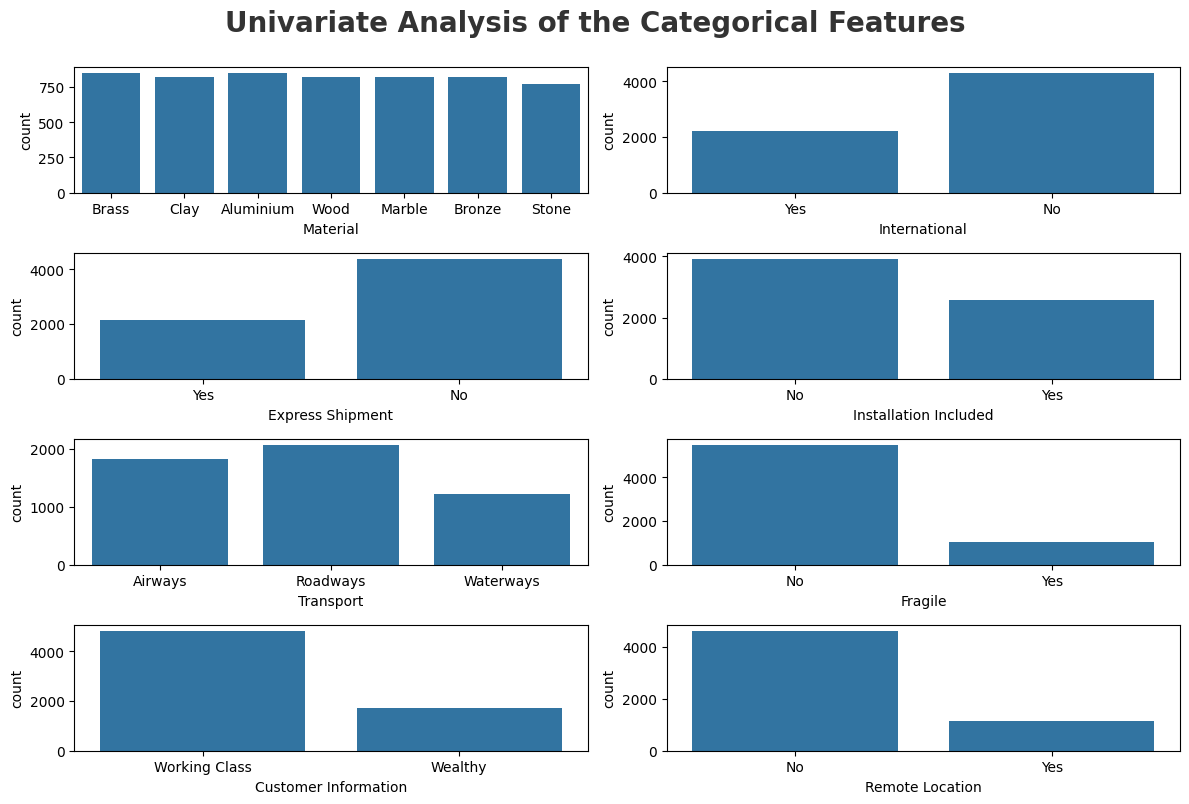

In [12]:
plt.figure(figsize=(12, 8))
plt.suptitle('Univariate Analysis of the Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_feature)):
    plt.subplot(4,2, i+1)
    sns.countplot(x=df[cat_feature[i]])
    plt.xlabel(cat_feature[i])
    plt.tight_layout()

Checking for the Null Values in the Dataset

In [13]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

## Multivariate Analysis: Numerical Columns 

In [14]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.000000,-0.000513,-0.009203,0.017113,0.054286,-0.011820,0.067368
Height,-0.000513,1.000000,0.768376,0.226543,0.200942,0.353858,0.106047
Width,-0.009203,0.768376,1.000000,0.329603,0.293544,0.332361,0.158159
Weight,0.017113,0.226543,0.329603,1.000000,0.890205,0.150856,0.417263
Price Of Sculpture,0.054286,0.200942,0.293544,0.890205,1.000000,0.134407,0.476231
Base Shipping Price,-0.011820,0.353858,0.332361,0.150856,0.134407,1.000000,0.053068
Cost,0.067368,0.106047,0.158159,0.417263,0.476231,0.053068,1.000000


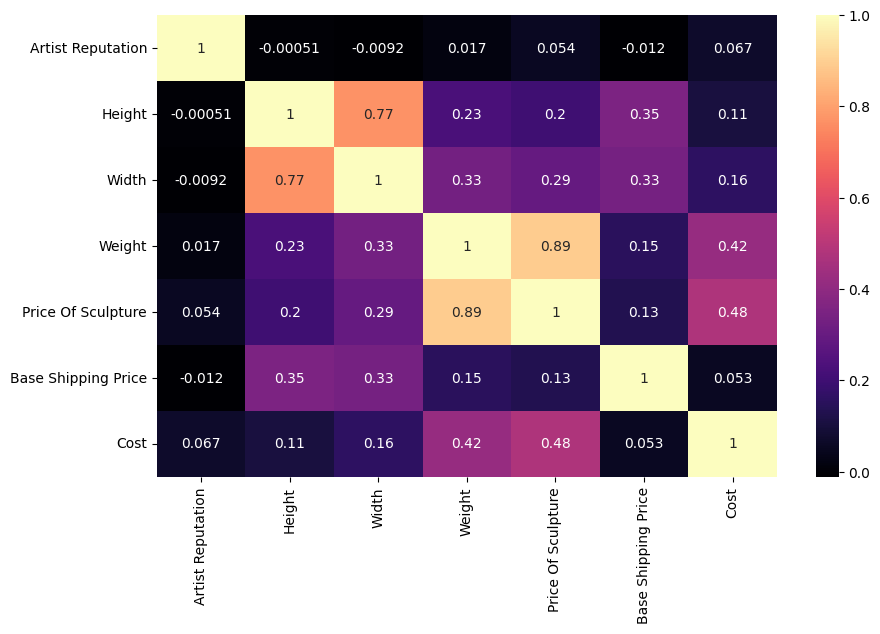

In [15]:
plt.figure(figsize = (10,6))
sns.heatmap(numeric_df.corr(),cmap='magma',annot = True)
plt.show()

## Relationship between Target column (Cost) and other Numerical Columns 

In [16]:
target_feature = 'Cost'

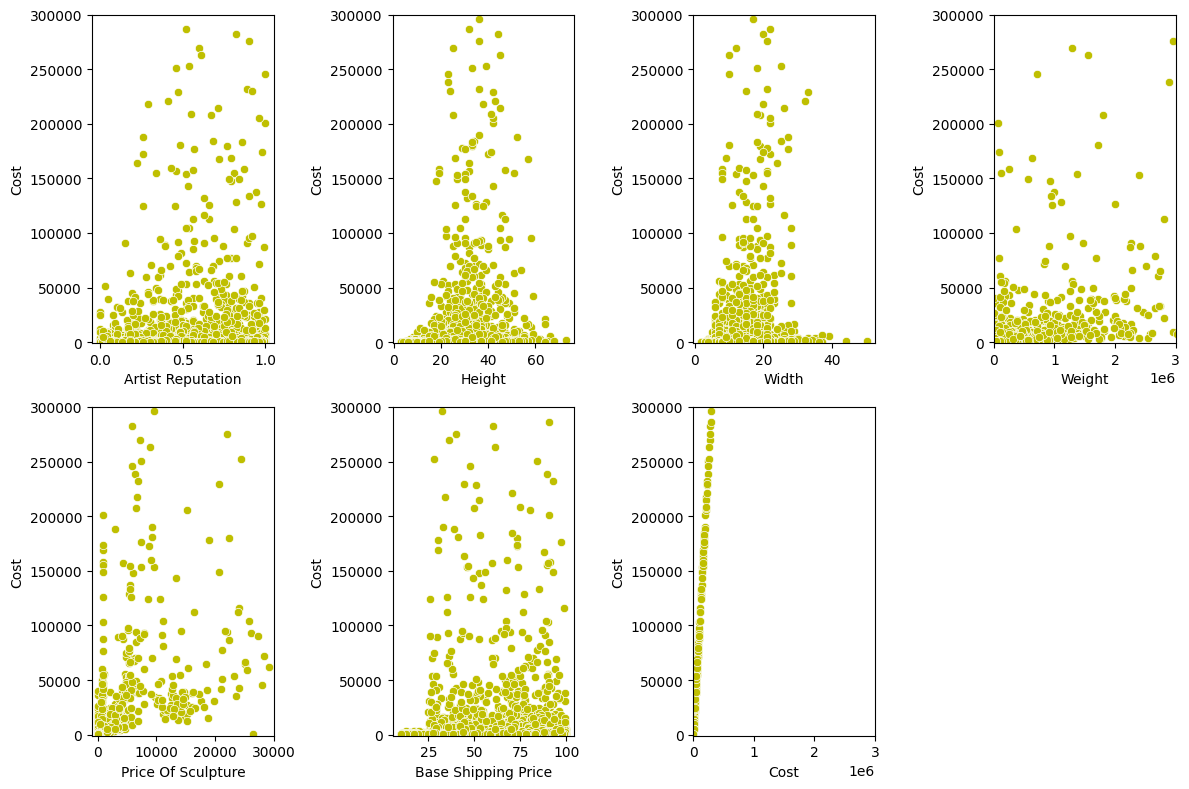

In [17]:
fig = plt.figure(figsize=(12, 8))

for i in range(0, len(num_col)):
    ax = plt.subplot(2,4, i+1)
    sns.scatterplot(data= df ,y=target_feature, x=num_col[i], color='y')
    if df[num_col[i]].max() > 30000:
        plt.xlim(-1000,30000)
    if df[num_col[i]].max() > 3000000:
        plt.xlim(-1000,3000000)
    plt.ylim(-1000, 300000)
    plt.tight_layout()

It is evident that there is no linear relation between Cost and Other numerical parameters.

Visualizing Target Variable - Cost 

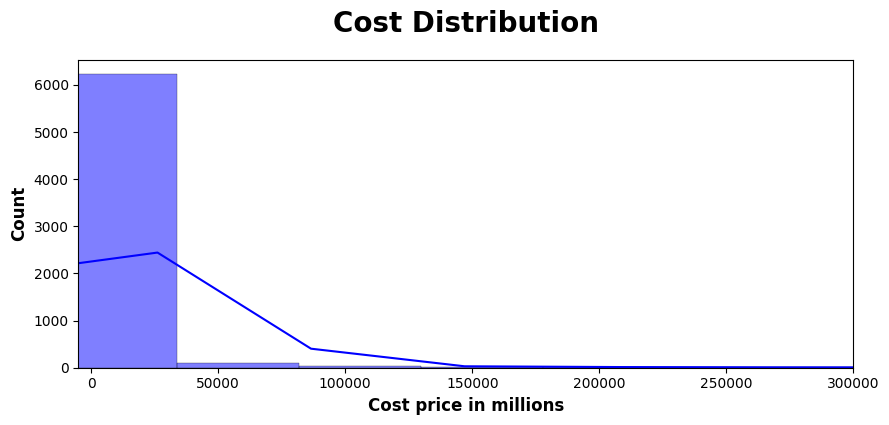

In [18]:
plt.subplots(figsize=(10,4))
sns.histplot(df[target_feature], bins=250, kde=True, color = 'b')
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.xlim(-5000,300000)
plt.show()

Relation between Shipping type and Cost of Shipping 

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\2939240081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=international.index, y=international.values, ec = "black", palette="Set2")


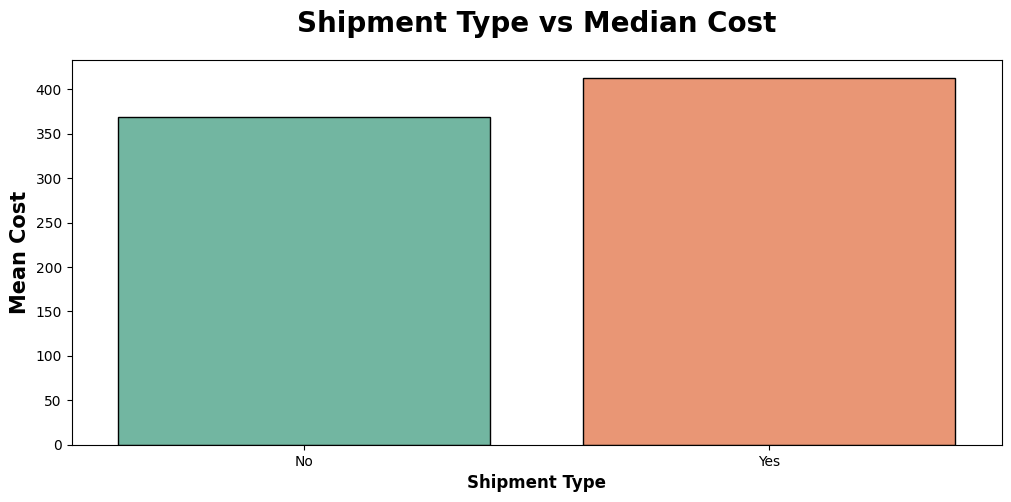

In [19]:
international = df.groupby('International')[target_feature].median()
international.to_frame()

plt.subplots(figsize=(12,5))
sns.barplot(x=international.index, y=international.values, ec = "black", palette="Set2")
plt.title("Shipment Type vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Shipment Type", weight="bold", fontsize=12)
plt.show()

In [20]:
df['International'].value_counts()

International
No     4294
Yes    2206
Name: count, dtype: int64

In [21]:
international_shipment_median = df[df['International'] == 'Yes']['Cost'].median()
domestic_shipment_median = df[df['International'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of International and domestic is {international_shipment_median-domestic_shipment_median}")

The difference between the median shipment price of International and domestic is 43.91500000000008


The difference between International and Domestic shipping price (Median) is 43.91 which is small and wont affect the prediction.

How much does Express Shipment and Normal Shipment affect overall cost of shipment.

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\2454933830.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=express_ship.index, y=express_ship.values, ec = "black", palette="Set1")


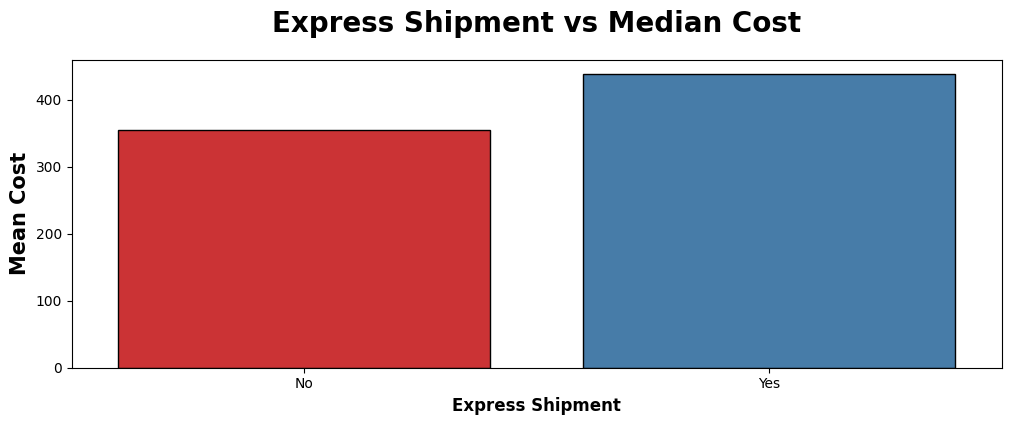

In [22]:
express_ship = df.groupby('Express Shipment')[target_feature].median()
express_ship.to_frame()

plt.subplots(figsize=(12,4))
sns.barplot(x=express_ship.index, y=express_ship.values, ec = "black", palette="Set1")
plt.title("Express Shipment vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Express Shipment", weight="bold", fontsize=12)
plt.show()

In [23]:
df['Express Shipment'].value_counts()

Express Shipment
No     4365
Yes    2135
Name: count, dtype: int64

In [24]:
express_shipment_median = df[df['Express Shipment'] == 'Yes']['Cost'].median()
normal_shipment_median = df[df['Express Shipment'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of express shipment and normal shipment is {express_shipment_median-normal_shipment_median}")

The difference between the median shipment price of express shipment and normal shipment is 83.08000000000004


The number of normal delivery is more than the Express Shipment 

And the Difference between these two is also not significant by just being 83.

Impact of installation on the cost of shipment 

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\2858760432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=installation.index, y=installation.values, ec = "black", palette="Set1")


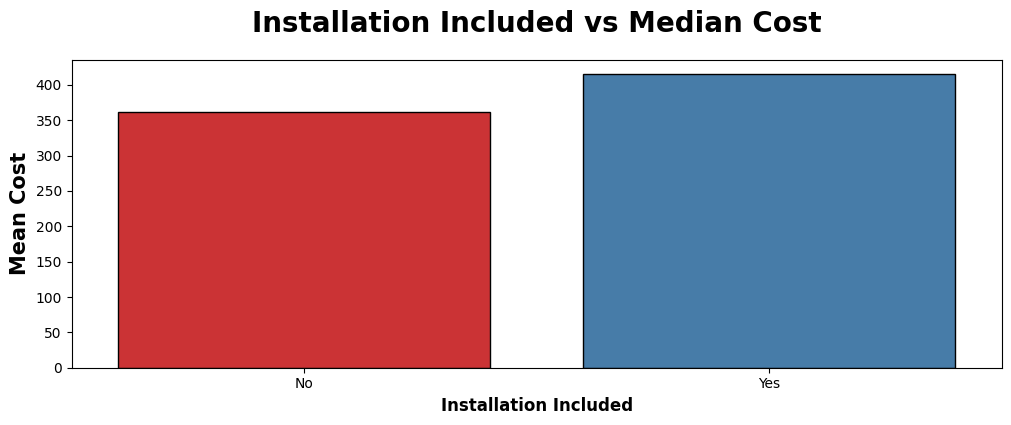

In [25]:
installation = df.groupby('Installation Included')[target_feature].median()
installation.to_frame()

plt.subplots(figsize=(12,4))
sns.barplot(x=installation.index, y=installation.values, ec = "black", palette="Set1")
plt.title("Installation Included vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Installation Included", weight="bold", fontsize=12)
plt.show()

In [26]:
df['Installation Included'].value_counts()

Installation Included
No     3916
Yes    2584
Name: count, dtype: int64

In [27]:
installation_needed_median = df[df['Installation Included'] == 'Yes']['Cost'].median()
installation_not_needed_median = df[df['Installation Included'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Installation Included and not is {installation_needed_median-installation_not_needed_median}")

The difference between the median shipment price of Installation Included and not is 53.67500000000001


Again the charges here wont make a huge difference and in more number of cases the installation is not included. 

Fragile shipment affect on cost of Shipment

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\1587106967.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fragile.index, y=fragile.values, ec = "black", palette="Set1")


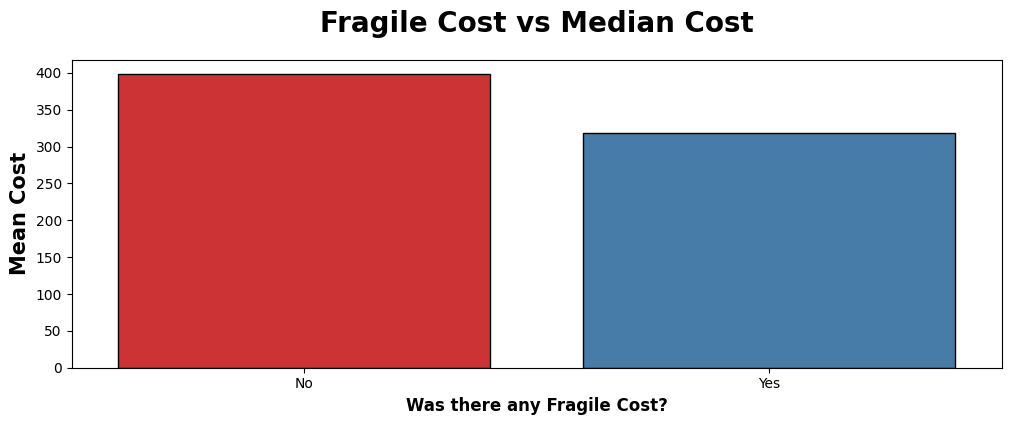

In [28]:
fragile = df.groupby('Fragile')[target_feature].median()
fragile.to_frame()

plt.subplots(figsize=(12,4))
sns.barplot(x=fragile.index, y=fragile.values, ec = "black", palette="Set1")
plt.title("Fragile Cost vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was there any Fragile Cost?", weight="bold", fontsize=12)
plt.show()

In [29]:
fragile_median = df[df['Fragile'] == 'Yes']['Cost'].median()
fragile_not_median = df[df['Fragile'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Fragile cost and non-fragile cost is {fragile_not_median-fragile_median}")

The difference between the median shipment price of Fragile cost and non-fragile cost is 80.03000000000003


It is not significant as the difference between fragile and non fragile is just 80.

Delivery location impact on the cost of shipment 

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\431063743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote.index, y=remote.values, ec = "black", palette="Set2")


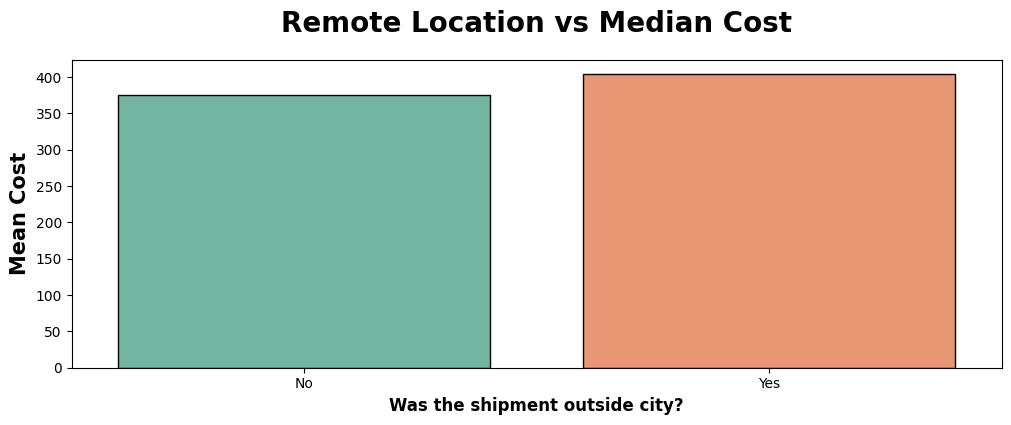

In [30]:
remote = df.groupby('Remote Location')[target_feature].median()
remote.to_frame()

plt.subplots(figsize=(12,4))
sns.barplot(x=remote.index, y=remote.values, ec = "black", palette="Set2")
plt.title("Remote Location vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was the shipment outside city?", weight="bold", fontsize=12)
plt.show()

In [31]:
remote_median = df[df['Remote Location'] == 'Yes']['Cost'].median()
not_remote_median = df[df['Remote Location'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {remote_median-not_remote_median}")

The difference between the median shipment price of remote shipment and non-remote shipment cost is 27.714999999999975


The difference between Local delivery (same city) and outside city is just 27 will not not impact much in overall cost of shipment.

Impact of Customer Financial condition on the Cost of Shipment

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\388988723.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cust_info.index, y=cust_info.values, ec = "black", palette="Set2")


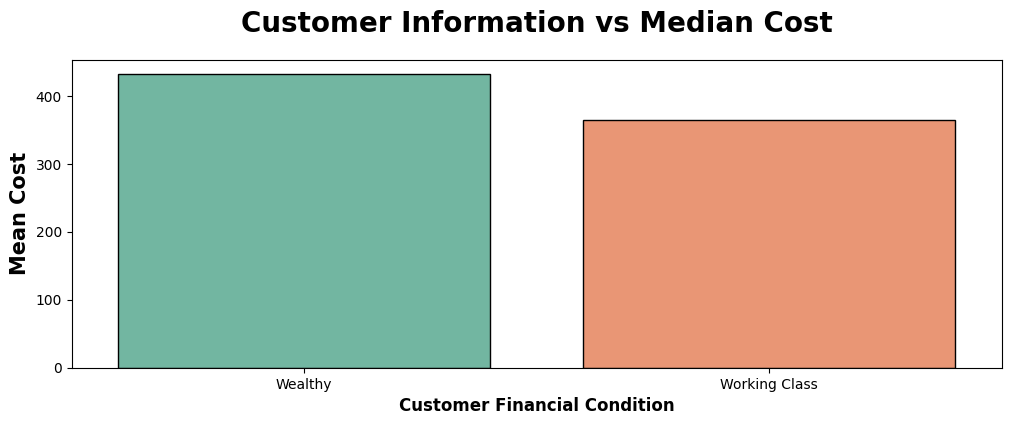

In [32]:
cust_info = df.groupby('Customer Information')[target_feature].median()
cust_info.to_frame()

plt.subplots(figsize=(12,4))
sns.barplot(x=cust_info.index, y=cust_info.values, ec = "black", palette="Set2")
plt.title("Customer Information vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)
plt.show()

In [33]:
customer_info_wealthy_median = df[df['Customer Information'] == 'Wealthy']['Cost'].median()
customer_info_working_class_median = df[df['Customer Information'] == 'Working Class']['Cost'].median()


print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {customer_info_wealthy_median-customer_info_working_class_median}")

The difference between the median shipment price of remote shipment and non-remote shipment cost is 66.94


Insight:

After understanding relationship between the target column and categorical columns, that there doesn't seem to be much pattern, which model can find in the categorical columns also.

## Visualizing Date columns

In [34]:
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\3964803925.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\3964803925.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])


In [35]:
df['year'] = pd.DatetimeIndex(df['Scheduled Date']).year
df['month'] = pd.DatetimeIndex(df['Scheduled Date']).month

In [36]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,year,month
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,...,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29,2015,6
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,...,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96,2017,3
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,...,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29,2015,3
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,...,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16,2015,5
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,...,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23,2016,12


In [37]:
x = df.groupby(["year", "month"])["Cost"].mean()
df_wide = x.unstack().T
df_wide.head(12)

year,2015,2016,2017,2018,2019
month,,,,,
1,1243.620800,12930.272703,13388.419779,47457.768519,2430.550495
2,34249.351818,10034.132545,3427.163673,6612.238687,3840.484630
3,23775.741185,10757.195810,41359.835804,20026.385455,2265.834019
4,94668.648276,4288.732696,26634.491452,4138.730309,8374.422975
5,15884.313833,4103.283514,8857.153077,17461.434118,14129.902741
6,4480.208318,12773.907113,121282.754000,4633.838018,8488.073774
7,1426.520159,5375.828978,36597.400391,6444.235526,9625.383254
8,17085.121760,10069.254050,-3546.622946,5935.121864,5167.774894
9,4258.188871,20046.773929,1854.061058,26486.177731,NaN


In [38]:
df_wide[2016]

month
1     12930.272703
2     10034.132545
3     10757.195810
4      4288.732696
5      4103.283514
6     12773.907113
7      5375.828978
8     10069.254050
9     20046.773929
10    20613.512273
11     7505.164333
12     2370.201793
Name: 2016, dtype: float64

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\1296080208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")


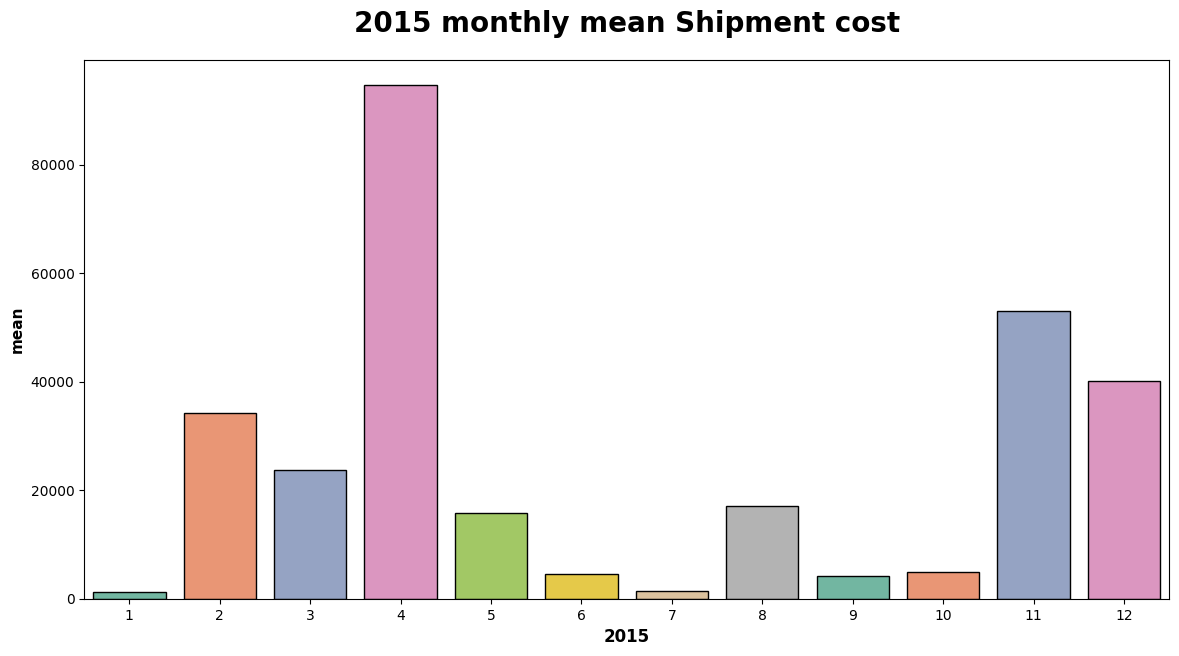

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\1296080208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")


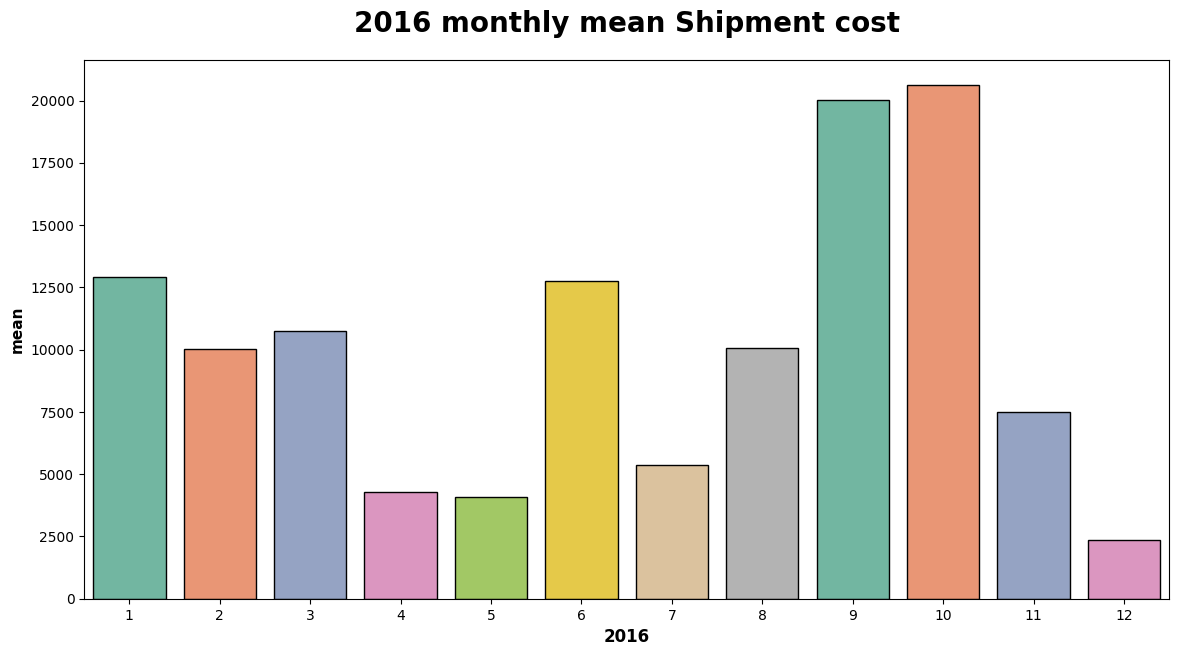

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\1296080208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")


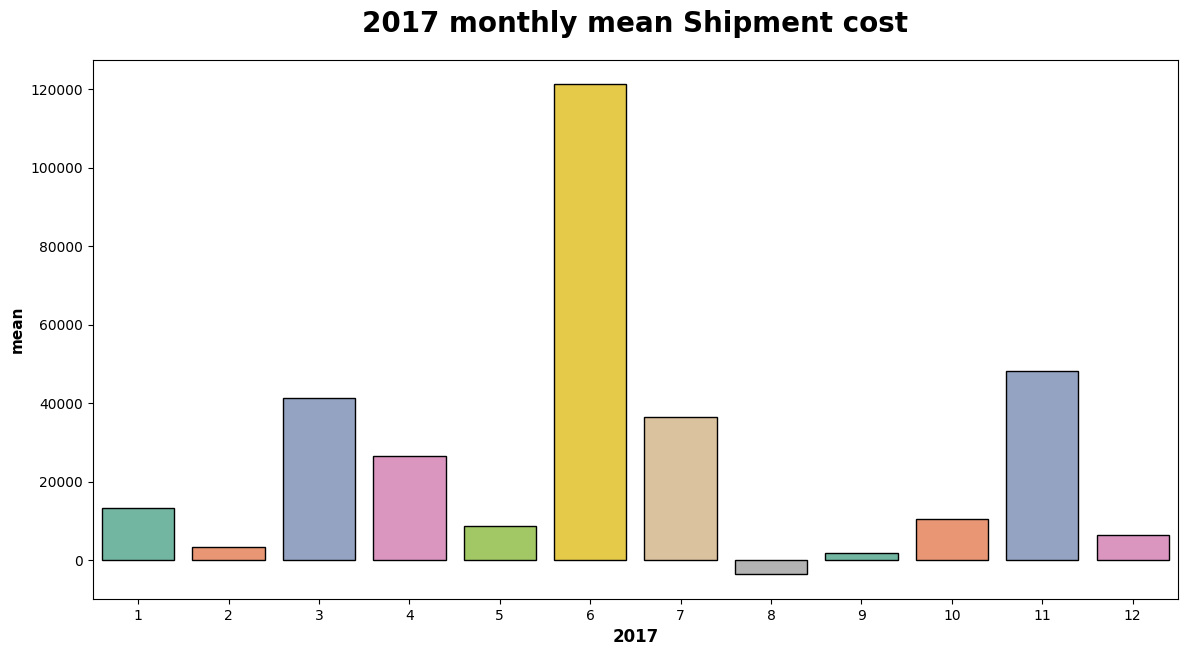

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\1296080208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")


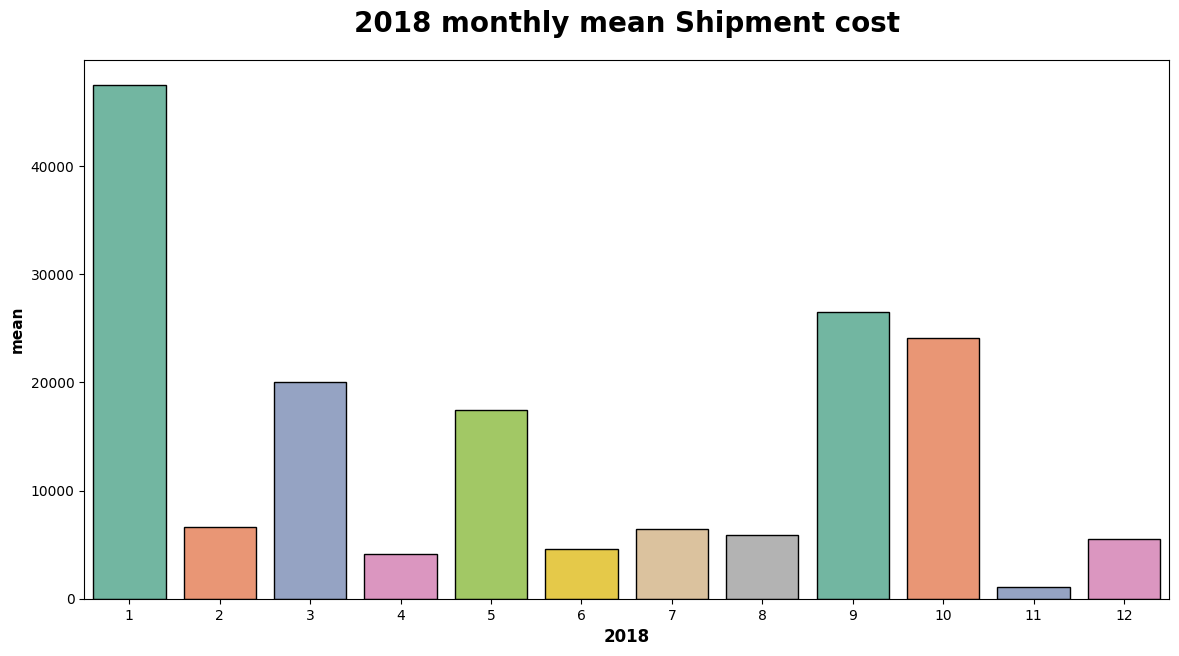

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\1296080208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")


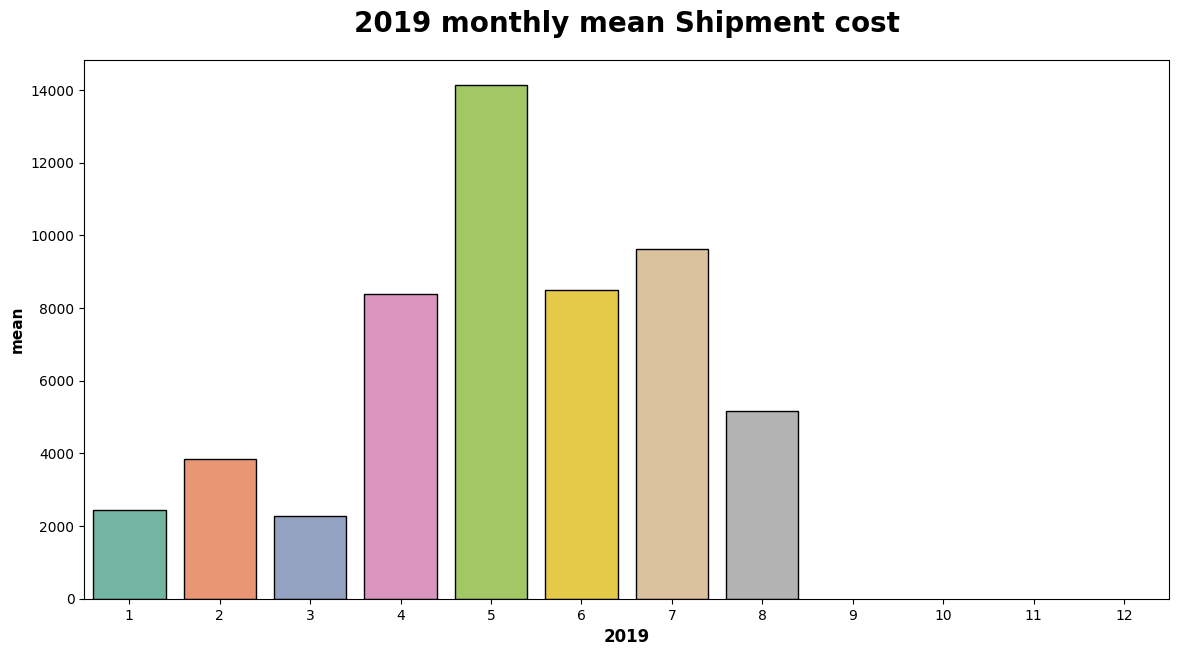

In [39]:
for i in df_wide.columns:
    plt.subplots(figsize=(14,7))
    sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")
    plt.title(str(i) + " monthly mean Shipment cost", weight="bold",fontsize=20, pad=20)
    plt.ylabel("mean", weight="bold", fontsize=11)
    plt.xlabel(i, weight="bold", fontsize=12)
    plt.show()

From 2015 to 2019

Every month has a different cost without any such major pattern.

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\3063941337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.year,ec = "black", palette="Set2")


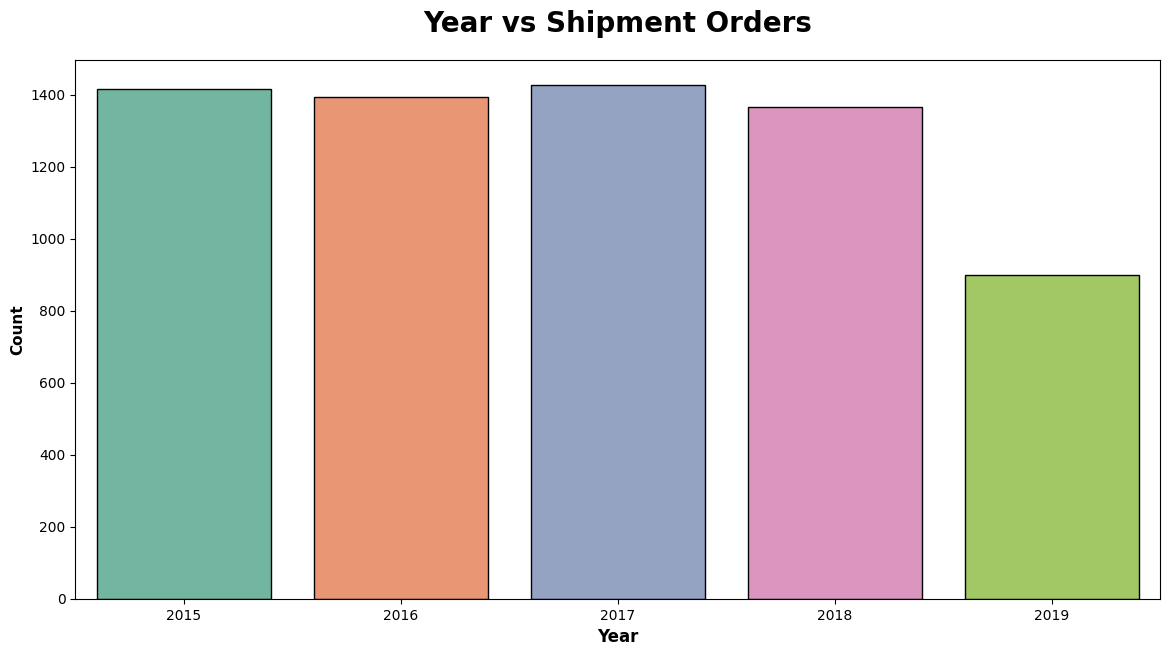

In [40]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.year,ec = "black", palette="Set2")
plt.title("Year vs Shipment Orders", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=11)
plt.xlabel("Year", weight="bold", fontsize=12)
plt.show()

C:\Users\arc10\AppData\Local\Temp\ipykernel_19604\1846697422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.month,ec = "black", palette="Set2")


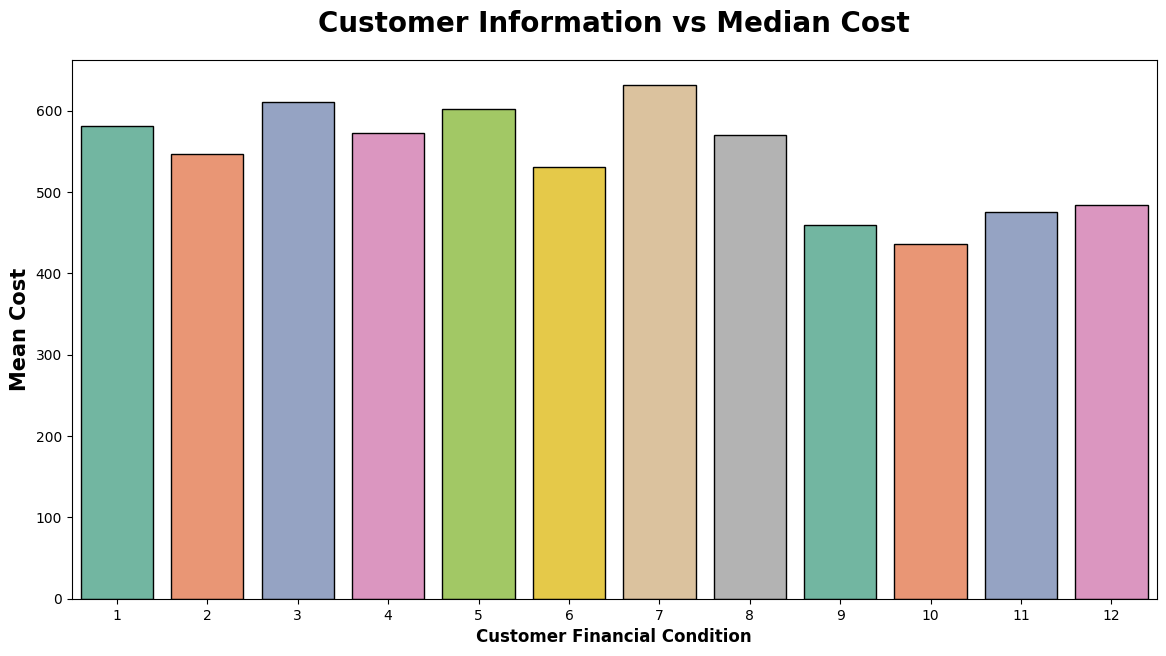

In [41]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.month,ec = "black", palette="Set2")
plt.title("Customer Information vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)
plt.show()

## Insights:

The target variable in this scenario is continuous, and it is represented by the "Cost" column, which we aim to predict. 

There are outliers present in some columns that need to be removed. 

Additionally, the date column should be configured to extract the year and month information. 

Furthermore, null values in the columns "Artist Reputation", "Height", "Width", "Weight", "Material", "Transport", and "Remote Location" need to be handled appropriately.